# A/B Testing and Binomial Analysis for Marketing Campaign Evaluation

## Problem Description

Marketing companies aim to run successful campaigns, but the market is complex, and several options can work. Therefore, they often conduct A/B tests, a randomized experimentation process in which two or more versions of a variable (web page, page element, banner, etc.) are shown to different segments of people simultaneously to determine which version has the maximum impact and drives business metrics.

Companies seek to answer two fundamental questions:

1. Would the campaign be successful?
2. If the campaign was successful, how much of that success could be attributed to the ads?

With the second question in mind, it is common to conduct an A/B test. The majority of people will be exposed to ads (the experimental group), while a small portion of people (the control group) will see a Public Service Announcement (PSA) (or nothing) in the exact size and place where the ad would normally appear.

The goal of this dataset is to analyze the groups, determine if the ads were successful, calculate the company's revenue potential from the ads, and assess whether the difference between the groups is statistically significant.

## Possible Solutions

1. **A/B Testing:** Evaluate the performance of marketing campaigns by comparing conversion rates between the experimental group (exposed to ads) and the control group (exposed to PSA or nothing).

2. **Binomial Testing:** Analyze the effectiveness of ads through binomial tests, allowing the assessment of conversion proportions and the identification of significant differences.

3. **Sample Size Determination:** Use statistical methods to calculate the minimum sample size needed to ensure adequate statistical power in the tests.

## Notebook Structure

1. **Introduction:**
   - Problem description and objectives.
   
2. **Data Exploration:**
   - Initial analysis of the dataset to understand its structure and characteristics.
   
3. **A/B Testing:**
   - Implementation of A/B testing to compare conversion rates between groups.
   
4. **Binomial Tests:**
   - Application of binomial tests to assess the effectiveness of ads.
   
5. **Sample Size Determination:**
   - Calculation of the minimum sample size to ensure statistically robust results.
   
6. **Conclusions:**
   - Summary of findings and recommendations based on the obtained results.

## Additional Considerations

- Inclusion of graphical visualizations to facilitate the interpretation of results.
- Detailed documentation of the steps and codes used.
- Reserved space for the inclusion of relevant images, performance charts, etc.


In [130]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as scs
import numpy as np

In [131]:
# LOAD FILE
df = pd.read_csv("dados/marketing_AB.csv")

2. **Data Exploration:**

In [132]:
# VIEW DF
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [133]:
# REMOVE UNUSED COLUMNS
df = df.drop(["Unnamed: 0", "total ads", "most ads hour", "most ads day"], axis=1)

In [134]:
# CREATING A LAMBDA FUNCTION TO RENAME AND REMOVE SPACES
df.rename(columns=lambda x: x.replace(" ", "_"), inplace=True)

In [135]:
# VIEW THE COUNT OF VALUES BETWEEN CONVERTED AND NOT CONVERTED
df["converted"].value_counts()

converted
False    573258
True      14843
Name: count, dtype: int64

In [136]:
# RENAMING THE CONVERTED COLUMN
df.loc[df["converted"] == True, "converted"] = 1
df.loc[df["converted"] == False, "converted"] = 0

In [137]:
# VIEWING AGAIN
df.head()

,user_id,test_group,converted
0,1069124,ad,0
1,1119715,ad,0
2,1144181,ad,0
3,1435133,ad,0
4,1015700,ad,0


In [138]:
# SEARCHING FOR NULL VALUES
df.isnull().sum()


user_id       0
test_group    0
converted     0
dtype: int64

In [139]:
# SEARCHING FOR DUPLICATED ROWS
df.duplicated().sum()


0

3. **A/B Testing:**

In [140]:
# VIEWING THE COUNT OF RECORDS PER GROUP
df["test_group"].value_counts()

test_group
ad     564577
psa     23524
Name: count, dtype: int64

In [141]:
# RENAMING THE GROUPS, ASSIGNING "A" TO THE CONTROL GROUP AND "B" TO THE TEST GROUP
df.loc[df["test_group"] == "ad", "test_group"] = "B"
df.loc[df["test_group"] == "psa", "test_group"] = "A"

In [142]:
# CREATING EXCLUSIVE DFs FOR THE GROUPS
df_a = df[df["test_group"] == "A"]
df_b = df[df["test_group"] == "B"]

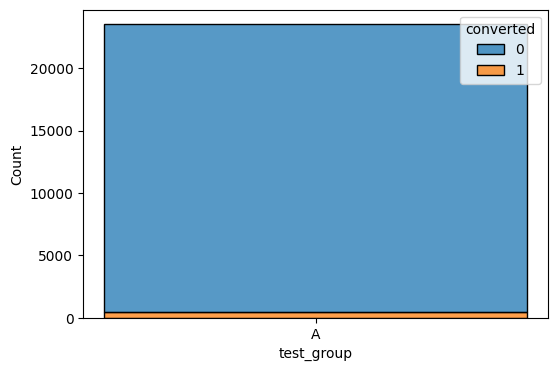

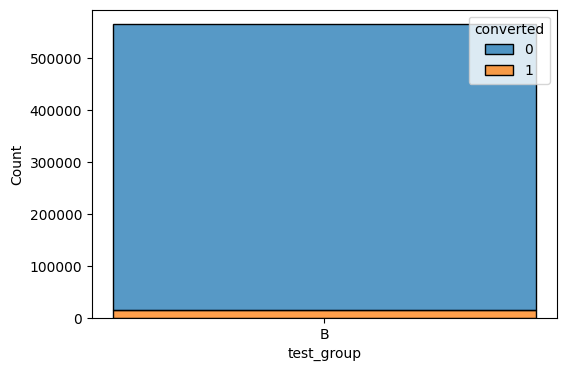

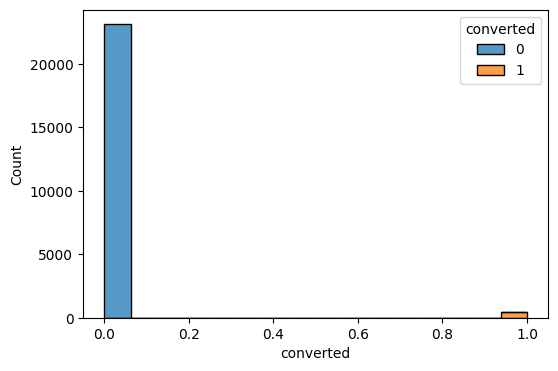

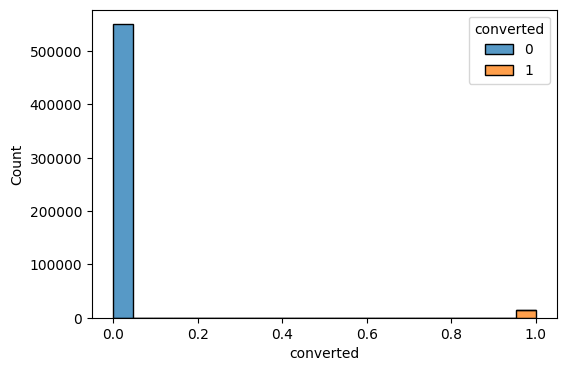

In [162]:
# GENERATING GROUP GRAPHS

for i in df.columns.drop(["user_id"]).to_list():
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df_a, x=i, hue="converted", multiple="stack")
    plt.show()
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df_b, x=i, hue="converted", multiple="stack")
    plt.show()

In [144]:
# CREATING A GROUPBY TO SEPARATE GROUPS BY CONVERTED VALUE
counts = df.groupby('test_group')['converted'].value_counts()


In [145]:
# TOTAL CONVERTED
convertido_A = counts[1]
convertido_B = counts[3]

# SAMPLE SIZE
total_A = counts[0] + counts[1]
total_B = counts[2] + counts[3]

# CONVERSION PERCENTAGE
p_conversao_a1 = counts[1] / (sum(counts[[0, 1]]))
p_conversao_b1 = counts[3] / (sum(counts[[2, 3]]))


4. **Binomial Tests:**

Text(0, 0.5, 'Probability')

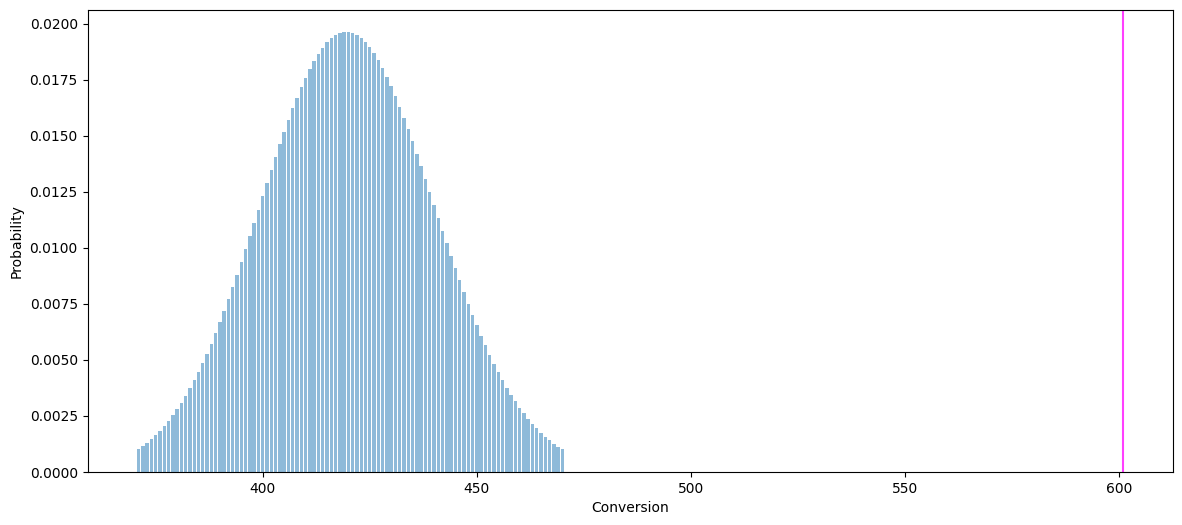

In [146]:
# Plot of the distribution of group A (control)

# Plotting area
fig, ax = plt.subplots(figsize=(14, 6))

# Test of A
x = np.linspace(convertido_A - 49, convertido_A + 50, 100)
y = scs.binom(total_A, p_conversao_a1).pmf(x)

# Create the vertical bar
ax.bar(x, y, alpha=0.5)
ax.axvline(x=p_conversao_b1 * total_A, c='magenta', alpha=0.75, linestyle='-')

# Labels
plt.xlabel('Conversion')
plt.ylabel('Probability')


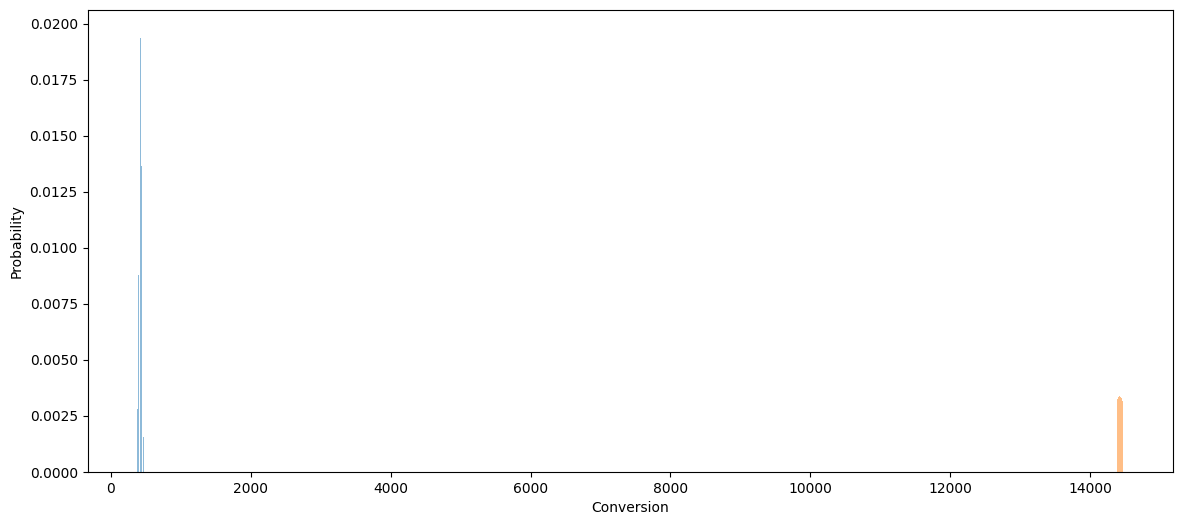

In [147]:
# Plot of the distribution of the 2 groups

# Plotting area
fig, ax = plt.subplots(figsize=(14, 6))

# A Graph
xA = np.linspace(convertido_A - 49, convertido_A + 50, 100)
yA = scs.binom(total_A, p_conversao_a1).pmf(xA)
ax.bar(xA, yA, alpha=0.5)

# B Graph
xB = np.linspace(convertido_B - 49, convertido_B + 50, 100)
yB = scs.binom(total_B, p_conversao_b1).pmf(xB)
ax.bar(xB, yB, alpha=0.5)

plt.xlabel('Conversion')
plt.ylabel('Probability')
plt.show()

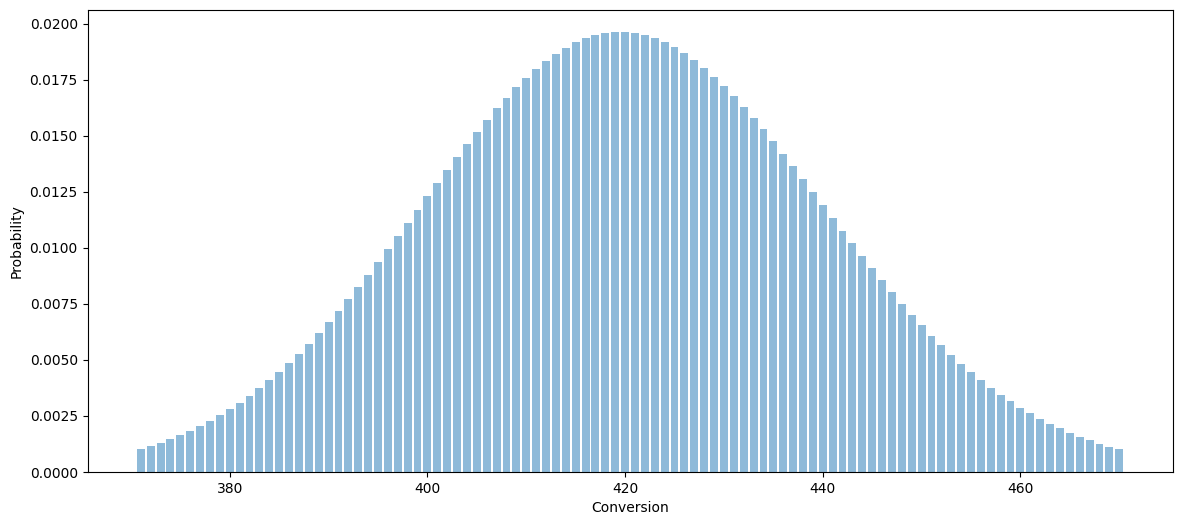

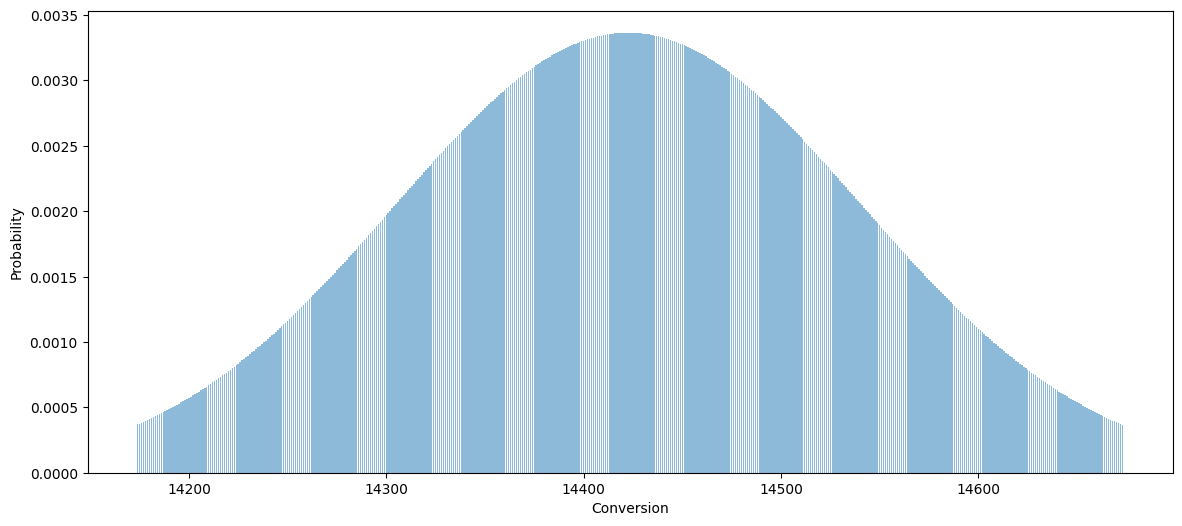

In [148]:
# Plot of the distribution of the 2 groups

# Plotting area for A
fig, ax = plt.subplots(figsize=(14, 6))
xA = np.linspace(convertido_A - 49, convertido_A + 50, 100)
yA = scs.binom(total_A, p_conversao_a1).pmf(xA)
ax.bar(xA, yA, alpha=0.5)
plt.xlabel('Conversion')
plt.ylabel('Probability')
plt.show()

# Plotting area for B
fig, ax = plt.subplots(figsize=(14, 6))
xB = np.linspace(convertido_B - 249, convertido_B + 250, 500)
yB = scs.binom(total_B, p_conversao_b1).pmf(xB)
ax.bar(xB, yB, alpha=0.5)
plt.xlabel('Conversion')
plt.ylabel('Probability')
plt.show()


In [149]:
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt

# Function to calculate the pooled probability or p_hat
def pooled_probability_func(total_A, total_B, exp_ctrl, exp_var):
    return (exp_ctrl + exp_var) / (total_A + total_B)

# Function to calculate the pooled standard error
def pooled_standard_error_func(total_A, total_B, exp_ctrl, exp_var):
    # Calculate the pooled probability
    p_hat = pooled_probability_func(total_A, total_B, exp_ctrl, exp_var)
    # Calculate the standard error using the appropriate formula
    SE = np.sqrt(p_hat * (1 - p_hat) * (1 / total_A + 1 / total_B))
    return SE

# Function to calculate the z-value based on the significance level
def z_value(sig_level=0.05, two_tailed=True):
    # Create a standard normal distribution
    z_dist = scs.norm()
    if two_tailed:
        # If the test is two-tailed, divide the significance level by 2
        sig_level = sig_level / 2
        area = 1 - sig_level
    else:
        area = 1 - sig_level
    # Calculate the z-value corresponding to the desired area
    z = z_dist.ppf(area)
    return z

# Function to calculate the confidence interval
def confidence_interval(sample_mean=0, sample_std=1, sample_size=1, sig_level=0.05):
    # Get the z-value based on the significance level
    z = z_value(sig_level)
    # Calculate the limits of the confidence interval
    left = sample_mean - z * sample_std / np.sqrt(sample_size)
    right = sample_mean + z * sample_std / np.sqrt(sample_size)
    return (left, right)

# Function to plot the confidence interval lines on the graph
def plot_confidence_interval(ax, mu, s, sig_level=0.05, color='grey'):
    # Calculate the limits of the confidence interval
    left, right = confidence_interval(sample_mean=mu, sample_std=s, sig_level=sig_level)
    # Plot vertical lines on the graph representing the confidence interval
    ax.axvline(left, c=color, linestyle='--', alpha=0.5)
    ax.axvline(right, c=color, linestyle='--', alpha=0.5)

# Function to plot the normal distribution
def plot_normal_distribution(ax, mu, std, with_confidence_interval=False, sig_level=0.05, label=None):
    # Create a set of values "x" for the normal distribution
    x = np.linspace(mu - 12 * std, mu + 12 * std, 1000)
    # Calculate the probability values of the normal distribution
    y = scs.norm(mu, std).pdf(x)
    # Plot the normal distribution on the graph
    ax.plot(x, y, label=label)
    if with_confidence_interval:
        # If specified, plot the confidence interval lines on the graph
        plot_confidence_interval(ax, mu, std, sig_level=sig_level)

# Function to plot the null hypothesis (H0) distribution
def plot_null_hypothesis(ax, stderr):
    # Plot the normal distribution with mean zero and specified standard error
    plot_normal_distribution(ax, 0, stderr, label="H0 - A - Null Hypothesis")
    # Plot the confidence interval lines for H0
    plot_confidence_interval(ax, mu=0, s=stderr, sig_level=0.05)

# Function to plot the alternative hypothesis (H1) distribution
def plot_alternative_hypothesis(ax, stderr, d_hat):
    # Plot the normal distribution with mean "d_hat" and specified standard error
    plot_normal_distribution(ax, d_hat, stderr, label="H1 - B - Alternative Hypothesis")

# Function to fill the area representing the power of the test on the graph
def show_power_area(ax, d_hat, stderr, sig_level):
    # Calculate the limits of the confidence interval for H0
    left, right = confidence_interval(sample_mean=0, sample_std=stderr, sig_level=sig_level)
    # Create a set of values "x" to fill the area
    x = np.linspace(-12 * stderr, 12 * stderr, 1000)
    # Create the null hypothesis distribution
    null = ab_dist(stderr, 'A')
    # Create the alternative hypothesis distribution
    alternative = ab_dist(stderr, d_hat, 'B')
    # Fill the area representing the power of the test on the graph
    ax.fill_between(x, 0, alternative.pdf(x), color='green', alpha=0.25, where=(x > right))
    # Add text indicating the power of the test on the graph
    ax.text(-3 * stderr, null.pdf(0), f'power = {1 - alternative.cdf(right):.3f}', fontsize=12, ha='right', color='k')

# Function to create a normal distribution
def ab_distribution(stderr, d_hat=0, group_type='A'):
    if group_type == 'A':
        sample_mean = 0
    elif group_type == 'B':
        sample_mean = d_hat
    dist = scs.norm(sample_mean, stderr)
    return dist

# Function to calculate the p-value
def p_value(total_A, total_B, p_conversao_a1, p_conversao_b1):
    return scs.binom(total_A, p_conversao_a1).pmf(p_conversao_b1 * total_B)

# bcr = Baseline Conversion Rate, in short, it is the conversion rate of the Control group.
# Main function to perform the A/B test
def abplot_func(total_A, total_B, bcr, d_hat, sig_level=0.05, show_p_value=True, show_legend=True):
    # Create a graph
    fig, ax = plt.subplots(figsize=(14, 8))
    # Calculate the number of conversions in samples A and B
    exp_ctrl = bcr * total_A
    exp_var = (bcr + d_hat) * total_B
    # Calculate the pooled standard error
    stderr = pooled_standard_error_func(total_A, total_B, exp_ctrl, exp_var)
    # Plot the null hypothesis (H0) distribution
    plot_null_hypothesis(ax, stderr)
    # Plot the alternative hypothesis (H1) distribution
    plot_alternative_hypothesis(ax, stderr, d_hat)
    # Set the limits of the graph
    ax.set_xlim(-8 * stderr, 14 * stderr)
    # Fill the area representing the power of the test on the graph
    show_power_area(ax, d_hat, stderr, sig_level)
    if show_p_value:
        # If desired, calculate and display the p-value on the graph
        null = ab_distribution(stderr, 'control')
        p_value_result = p_value(total_A, total_B, bcr, bcr + d_hat)
        ax.text(3 * stderr, null.pdf(0), f'p-value = {p_value_result:.4f}', fontsize=14, ha='left')
    if show_legend:
        # If desired, display the legend on the graph
        plt.legend(loc="lower left", bbox_to_anchor=(0, 1.0))
    plt.xlabel('X Normally distributed, z-scores')
    plt.ylabel('Probability Density of Normal Distributions')
    plt.show()


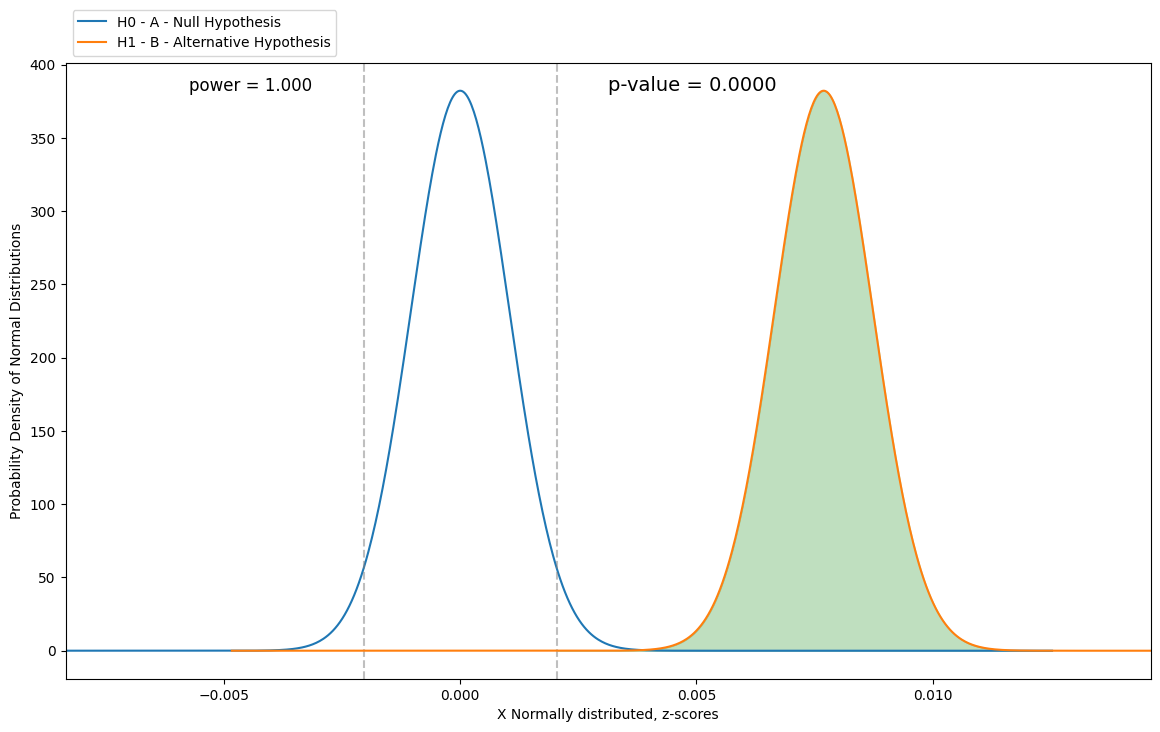

In [151]:
# Effect size, the difference between the values.
d_hat = p_conversao_b1 - p_conversao_a1
# Perform the A/B test function
abplot_func(total_A, total_B, p_conversao_a1, d_hat)

In [159]:
p_conversao_a1

0.01785410644448223

5. **Sample Size Determination:**

In [152]:
# Function to find the minimum sample size
def amostra_min(total_A, 
                total_B, 
                p_conversao_a1, 
                p_conversao_b1, 
                power=0.8, 
                sig_level=0.05, 
                two_sided=False):
    d_hat = p_conversao_b1 - p_conversao_a1
    k = total_A / total_B
    
    # Normal distribution to determine z values
    standard_norm = scs.norm(0, 1)

    # Find the z value for statistical power
    Z_beta = standard_norm.ppf(power)
    
    # Find alpha z
    if two_sided == True:
        Z_alpha = standard_norm.ppf(1 - sig_level/2)
    else:
        Z_alpha = standard_norm.ppf(1 - sig_level)

    # Pooled probability
    pooled_prob = (p_conversao_a1 + p_conversao_b1) / 2

    # Minimum sample size
    min_N = (2 * pooled_prob * (1 - pooled_prob) * (Z_beta + Z_alpha)**2 / d_hat**2)    

    return min_N


In [154]:
# Calculate the minimum sample size with two_sided = True
amostra_min(total_A, total_B, p_conversao_a1, p_conversao_b1, power=0.8, sig_level=0.05, two_sided=True)

5631.787382615137

In [155]:
# Calculate the minimum sample size with two_sided = False
amostra_min(total_A, total_B, p_conversao_a1, p_conversao_b1, power=0.8, sig_level=0.05, two_sided=False)

4436.155093472385

6. **Conclusions:**

# A/B Test - Conclusion

Based on the results of the conducted A/B test, we can draw the following conclusions:

- **Significant Difference:** We observed a statistically significant difference in conversion rates between groups A (control) and B (experimental).
  
- **Observed Effect:** The `d_hat` value was calculated at approximately 0.0077, indicating a small but statistically significant advantage for group B.

- **Statistical Evidence:** The associated p-value was practically zero, reinforcing the statistical evidence of the observed difference.

- **High Statistical Power:** The test exhibited high statistical power, reaching 1.0, indicating its ability to detect the difference when it truly exists.

- **Minimum Sample Size:** The minimum sample size was calculated with two_sided equal to True, resulting in 5631.79, and with two_sided equal to False, resulting in 4436.16.

These results suggest that the introduction of ads had a significant impact on conversion rates compared to the control group.
